Name: plot_precip.ipynb

Author: Robert M. Frost

NOAA Global Systems Laboratory

Created: 07 July 2023

Purpose: Plot precipitation accumulation

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import cartopy.crs as ccrs
import cartopy.feature as cpf
import numpy as np
from UFSutils import read_grib
import geopandas as gpd
import seaborn
import matplotlib.colors as mcolors

Important parameters

In [2]:
# hour of interest
hr = 24
# hour at which the forecast was initialized (UTC)
init = 12
# directory where hrrr grib data are located
dgrib_h = "/scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2023041912_3km_hrrrphys/2023041912/postprd/"
# directory where rap grib data are located
dgrib_r = "/scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2023041912_3km_rapphys/2023041912/postprd/"
# natlev or prslev
nat_prs = "natlev"
# message number for total precip accu
mn_precip = 1374
# message number for non-convective precip accu
mn_nonc = 1376
# directory for figure to be output
figdir = "/scratch2/BMC/fv3lam/Robby.Frost/figures/2023041912/precip/"

Read in precip

In [3]:
hrrr, precip_h, lat, lon, valid_date = read_grib(init, hr, dgrib_h, nat_prs, mn_precip, ret_type=0)
rap, precip_r, lat, lon, valid_date = read_grib(init, hr, dgrib_r, nat_prs, mn_precip, ret_type=0)
nonc_h = hrrr[mn_nonc]
nonc_r = rap[mn_nonc]

Reading in /scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2023041912_3km_hrrrphys/2023041912/postprd/rrfs.t12z.natlev.f024.rrfs_conuscompact_3km.grib2
Finished reading in Total Precipitation
Reading in /scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2023041912_3km_rapphys/2023041912/postprd/rrfs.t12z.natlev.f024.rrfs_conuscompact_3km.grib2
Finished reading in Total Precipitation


In [4]:
# plotting setup
rc('font',weight='normal',size=12.5)
# rc('text',usetex='True')
rc('figure',facecolor='white')

Plot precip accumulation in Oklahoma and Texas

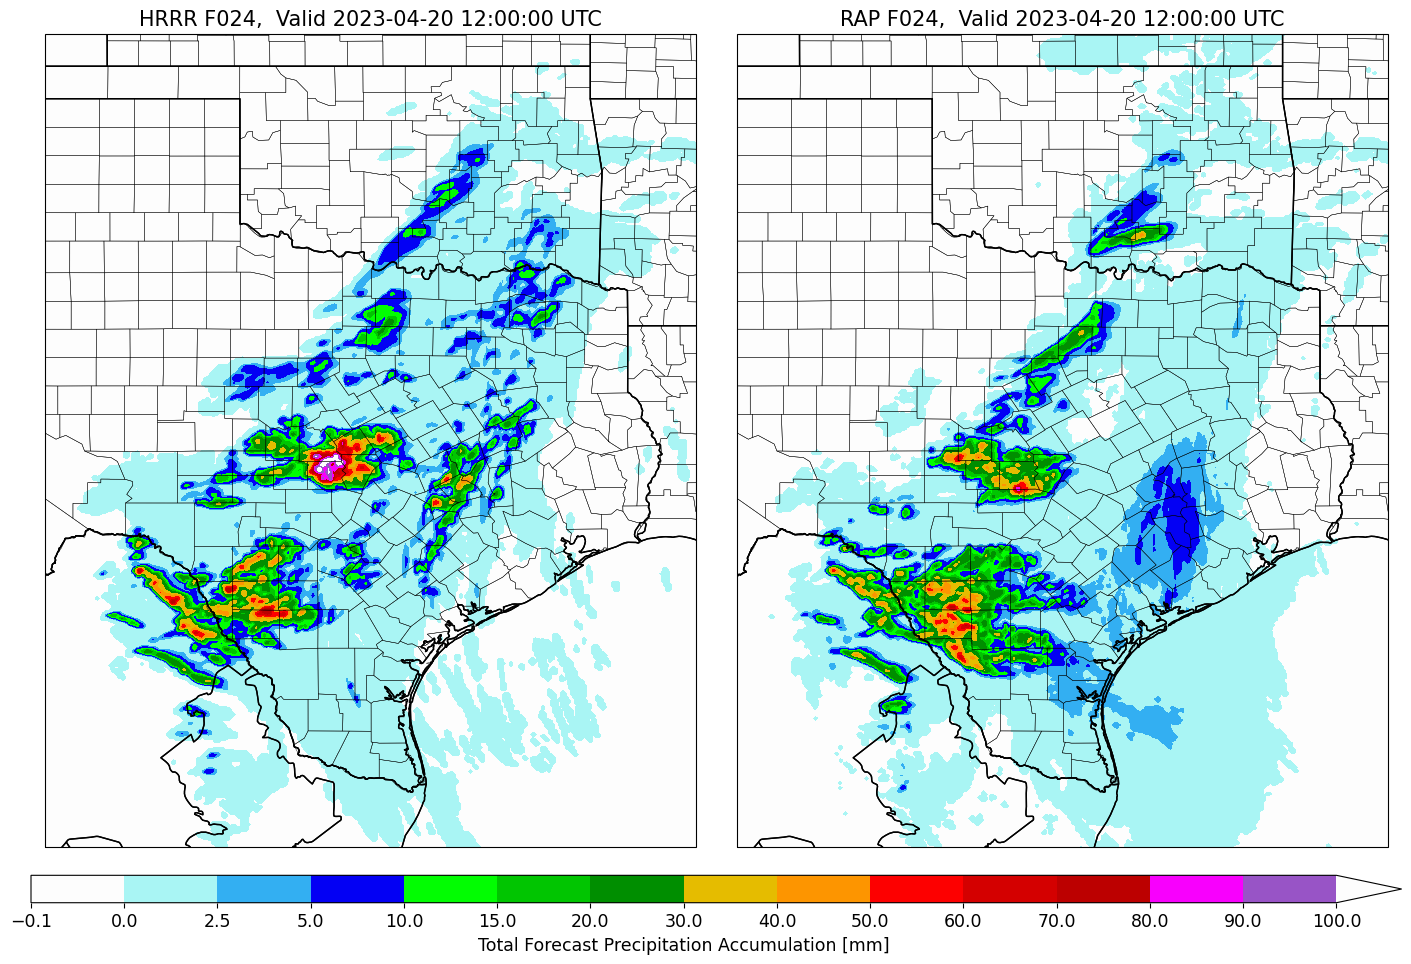

In [5]:
# custom colorbar using NWS precip accumulation
nws_precip_colors = [
    "#fdfdfd",
    "#a9f5f4",
    "#33aff2",
    "#0300f4",
    "#02fd02",
    "#01c501",
    "#008e00",
    "#fdf802",
    "#e5bc00",
    "#fd9500",
    "#fd0000",
    "#d40000",
    "#bc0000",
    "#f800fd",
    "#9854c6",
    "#fdfdfd" 
]
colors = mcolors.ListedColormap(nws_precip_colors)
# custom colorbar values
clevs = [-0.1, 0.0, 2.5, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# normalize colors around clevs
norm = mcolors.BoundaryNorm(clevs, 16)

# create plot
fig, ax = plt.subplots(ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(14,9.5), constrained_layout=True)

# plot HRRR
c0 = ax[0].contourf(lon, lat, precip_h.values, clevs, 
                    transform=ccrs.PlateCarree(), 
                    cmap=colors, norm=norm, extend="max")
# plot RAP
c1 = ax[1].contourf(lon, lat, precip_r.values, clevs, 
                    transform=ccrs.PlateCarree(), 
                    cmap=colors, norm=norm, extend="max")

# mapping
plt_area = [-103, -93, 25, 37.5] # W, E, S, N
for i, iax in enumerate(ax):
    iax.coastlines()
    iax.add_feature(cpf.BORDERS)
    iax.add_feature(cpf.STATES)
    iax.set_extent(plt_area)
    # Load the json file with county coordinates
    geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')
    geoData.plot(ax=iax, color="none", lw=0.3, aspect=1)

# set title
ax[0].set_title(f"HRRR F0{hr},  Valid 2023-04-20 12:00:00 UTC")
ax[1].set_title(f"RAP F0{hr},  Valid 2023-04-20 12:00:00 UTC")

# Add colorbar
cbar = fig.colorbar(c1, ax=ax, orientation='horizontal', extend=True, pad=0.03, aspect=50)
cbar.set_label('Total Forecast Precipitation Accumulation [mm]')
cbar.set_ticks(clevs)

# save and close figure
plt.savefig(f"{figdir}precip_OKTX.png")
plt.show()
plt.close()

Plot precip accumulation difference in Oklahoma and Texas

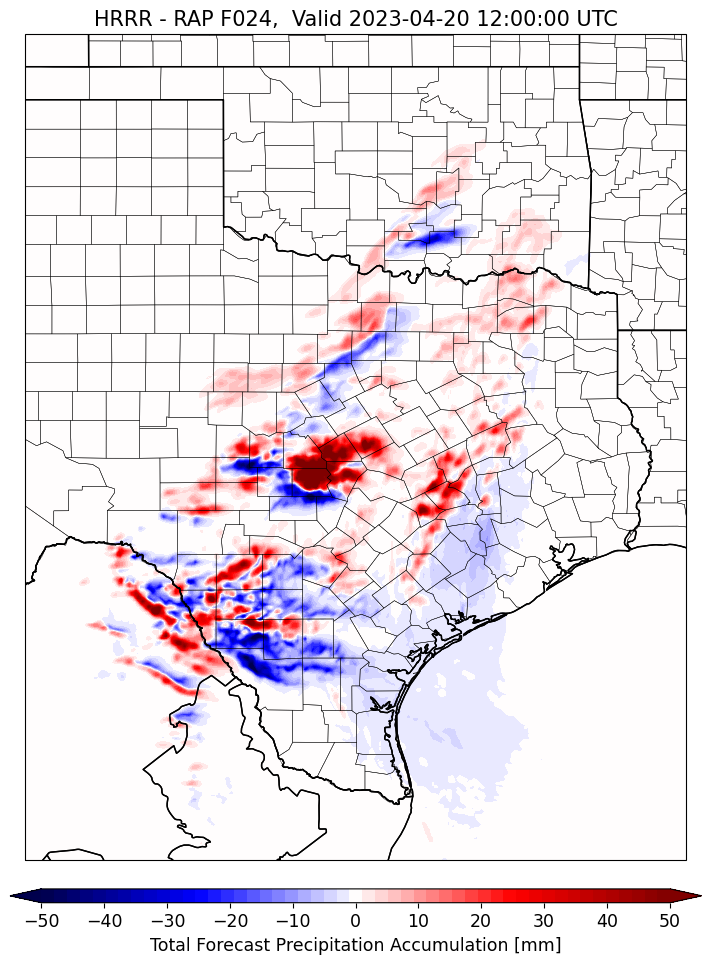

In [6]:
# Define your custom colorbar bounds
cbar_min = -50
cbar_max = 50.1
clevs = np.linspace(cbar_min, cbar_max, 50)
# color palette
colors = seaborn.color_palette("seismic", as_cmap=True)

# create plot
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, 
                       figsize=(7,9.5), constrained_layout=True)

# plot HRRR - RAP
c0 = ax.contourf(lon, lat, precip_h.values - precip_r.values,
                 clevs, transform=ccrs.PlateCarree(),
                 cmap=colors, extend="both")

# mapping
plt_area = [-103, -93, 25, 37.5] # W, E, S, N
ax.coastlines()
ax.add_feature(cpf.BORDERS)
ax.add_feature(cpf.STATES)
ax.set_extent(plt_area)
# Load the json file with county coordinates
geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')
geoData.plot(ax=ax, color="none", lw=0.3, aspect=1)

# set title
ax.set_title(f"HRRR - RAP F0{hr},  Valid 2023-04-20 12:00:00 UTC")

# Add colorbar
cbar = fig.colorbar(c0, ax=ax, orientation='horizontal', extend=True, pad=0.03, aspect=50)
cbar.set_label('Total Forecast Precipitation Accumulation [mm]')
cbar.set_ticks(np.arange(cbar_min, cbar_max, 10))

# save figure
plt.show()
fig.savefig(f"{figdir}precipdiff_OKTX.png")
plt.close()

Plot precipitation accumulation over Oklahoma

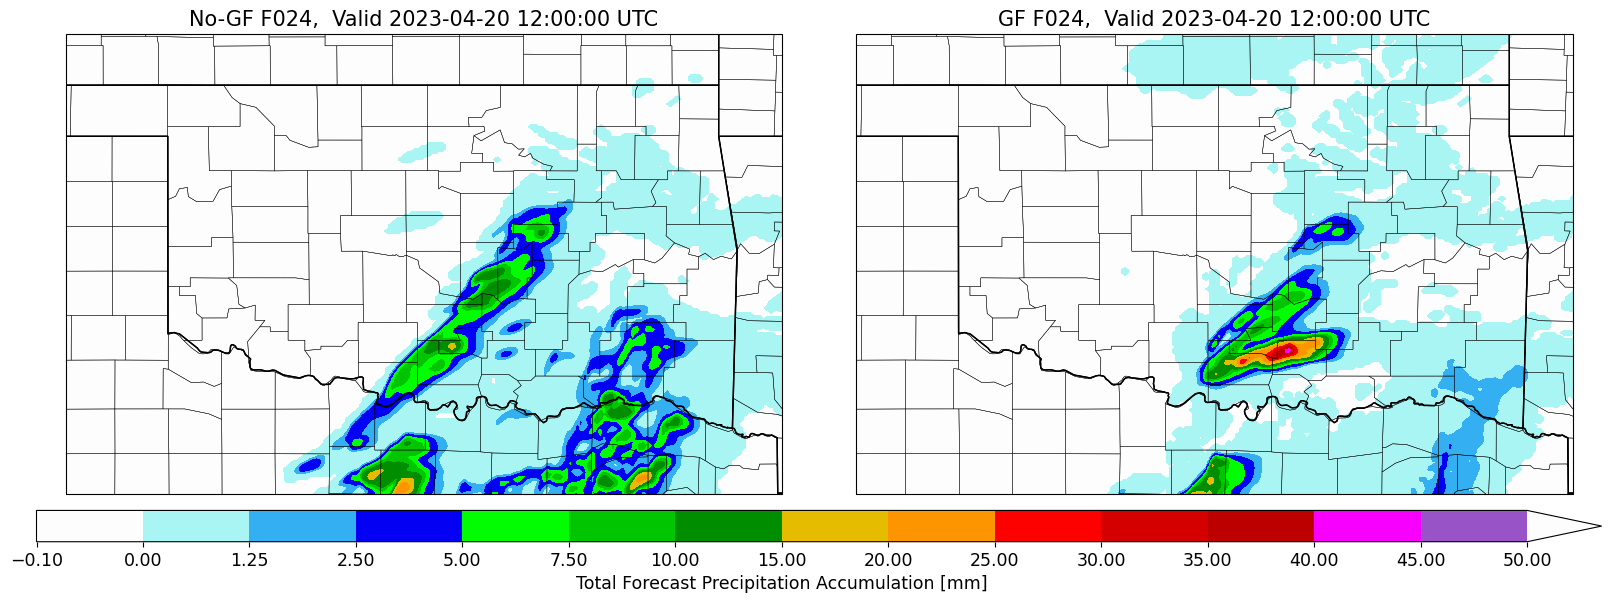

In [7]:
# custom colorbar using NWS precip accumulation
nws_precip_colors = [
    "#fdfdfd",
    "#a9f5f4",
    "#33aff2",
    "#0300f4",
    "#02fd02",
    "#01c501",
    "#008e00",
    "#fdf802",
    "#e5bc00",
    "#fd9500",
    "#fd0000",
    "#d40000",
    "#bc0000",
    "#f800fd",
    "#9854c6",
    "#fdfdfd" 
]
colors = mcolors.ListedColormap(nws_precip_colors)
# custom colorbar values
clevs = [-0.1, 0.0, 1.25, 2.5, 5, 7.5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
# normalize colors around clevs
norm = mcolors.BoundaryNorm(clevs, 16)

# create plot
fig, ax = plt.subplots(ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(16,5.9), constrained_layout=True)

# plot HRRR
c0 = ax[0].contourf(lon, lat, precip_h.values, clevs, 
                    transform=ccrs.PlateCarree(), 
                    cmap=colors, norm=norm, extend="max")
# plot RAP
c1 = ax[1].contourf(lon, lat, precip_r.values, clevs, 
                    transform=ccrs.PlateCarree(), 
                    cmap=colors, norm=norm, extend="max")

# mapping
plt_area = [-101, -94, 33, 37.5] # W, E, S, N
for i, iax in enumerate(ax):
    iax.coastlines()
    iax.add_feature(cpf.BORDERS)
    iax.add_feature(cpf.STATES)
    iax.set_extent(plt_area)
    # Load the json file with county coordinates
    geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')
    geoData.plot(ax=iax, color="none", lw=0.3, aspect=1)

# set title
ax[0].set_title(f"No-GF F0{hr},  Valid 2023-04-20 12:00:00 UTC")
ax[1].set_title(f"GF F0{hr},  Valid 2023-04-20 12:00:00 UTC")

# Add colorbar
cbar = fig.colorbar(c1, ax=ax, orientation='horizontal', extend=True, pad=0.03, aspect=50)
cbar.set_label('Total Forecast Precipitation Accumulation [mm]')
cbar.set_ticks(clevs)

# save and close figure
plt.savefig(f"{figdir}precip_OK.png")
plt.show()
plt.close()

Plot total precipitation accumulation difference in Oklahoma

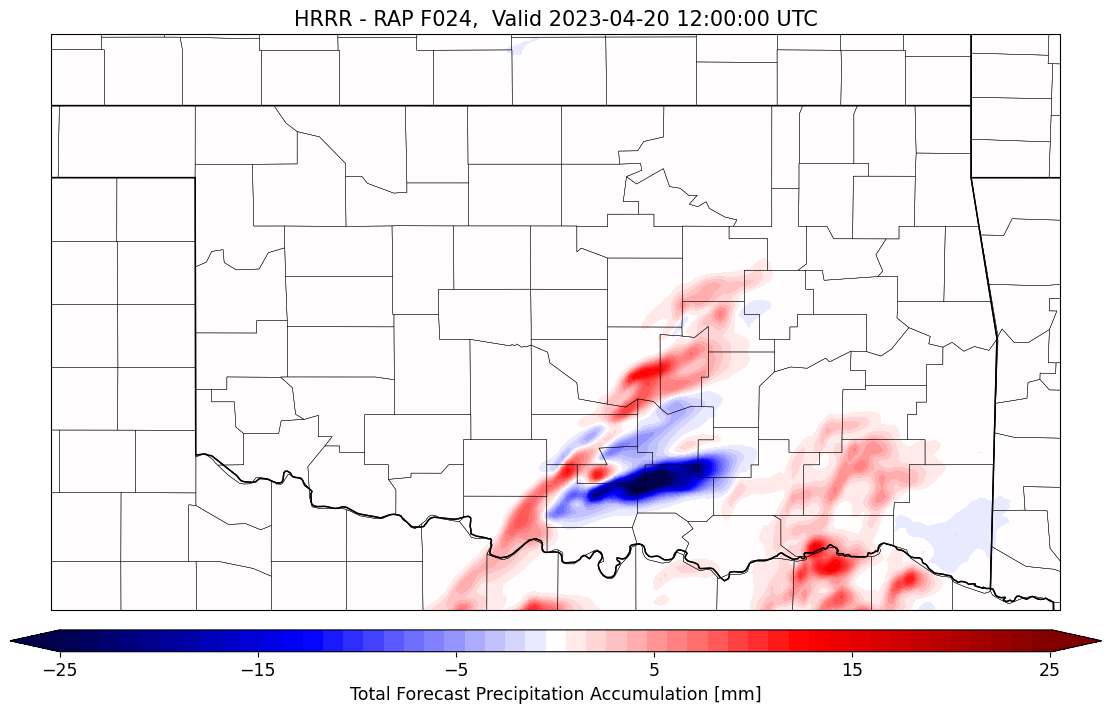

In [8]:
# Define your custom colorbar bounds
cbar_min = -25
cbar_max = 25.1
clevs = np.linspace(cbar_min, cbar_max, 50)
# color palette
colors = seaborn.color_palette("seismic", as_cmap=True)

# create plot
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, 
                       figsize=(11,7), constrained_layout=True)

# plot HRRR - RAP
c0 = ax.contourf(lon, lat, precip_h.values - precip_r.values,
                 clevs, transform=ccrs.PlateCarree(),
                 cmap=colors, extend="both")

# mapping
plt_area = [-101, -94, 33.5, 37.5] # W, E, S, N
ax.coastlines()
ax.add_feature(cpf.BORDERS)
ax.add_feature(cpf.STATES)
ax.set_extent(plt_area)
# Load the json file with county coordinates
geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')
geoData.plot(ax=ax, color="none", lw=0.3, aspect=1)

# set title
ax.set_title(f"HRRR - RAP F0{hr},  Valid 2023-04-20 12:00:00 UTC")

# Add colorbar
cbar = fig.colorbar(c0, ax=ax, orientation='horizontal', extend=True, pad=0.03, aspect=50)
cbar.set_label('Total Forecast Precipitation Accumulation [mm]')
cbar.set_ticks(np.arange(cbar_min, cbar_max, 10))

# save figure
plt.show()
fig.savefig(f"{figdir}precipdiff_OK.png")
plt.close()

Plot precipitation accumulation over Texas

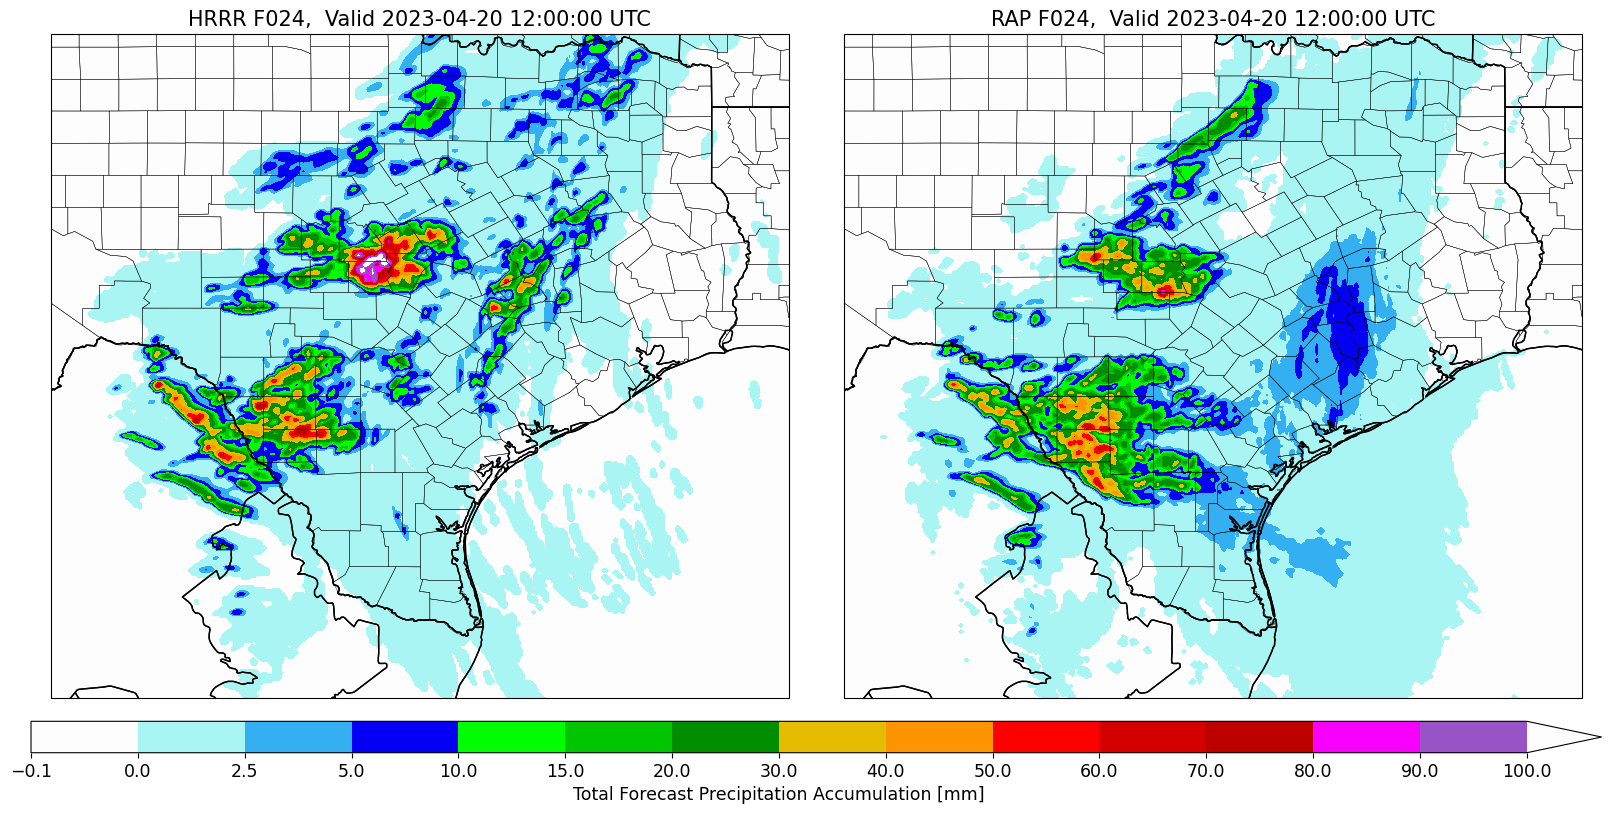

In [9]:
# custom colorbar using NWS precip accumulation
nws_precip_colors = [
    "#fdfdfd",
    "#a9f5f4",
    "#33aff2",
    "#0300f4",
    "#02fd02",
    "#01c501",
    "#008e00",
    "#fdf802",
    "#e5bc00",
    "#fd9500",
    "#fd0000",
    "#d40000",
    "#bc0000",
    "#f800fd",
    "#9854c6",
    "#fdfdfd" 
]
colors = mcolors.ListedColormap(nws_precip_colors)
# custom colorbar values
clevs = [-0.1, 0.0, 2.5, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# normalize colors around clevs
norm = mcolors.BoundaryNorm(clevs, 16)

# create plot
fig, ax = plt.subplots(ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(16,8), constrained_layout=True)

# plot HRRR
c0 = ax[0].contourf(lon, lat, precip_h.values, clevs, 
                    transform=ccrs.PlateCarree(), 
                    cmap=colors, norm=norm, extend="max")
# plot RAP
c1 = ax[1].contourf(lon, lat, precip_r.values, clevs, 
                    transform=ccrs.PlateCarree(), 
                    cmap=colors, norm=norm, extend="max")

# mapping
plt_area = [-103, -93, 25, 34] # W, E, S, N
for i, iax in enumerate(ax):
    iax.coastlines()
    iax.add_feature(cpf.BORDERS)
    iax.add_feature(cpf.STATES)
    iax.set_extent(plt_area)
    # Load the json file with county coordinates
    geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')
    geoData.plot(ax=iax, color="none", lw=0.3, aspect=1)

# set title
ax[0].set_title(f"HRRR F0{hr},  Valid 2023-04-20 12:00:00 UTC")
ax[1].set_title(f"RAP F0{hr},  Valid 2023-04-20 12:00:00 UTC")

# Add colorbar
cbar = fig.colorbar(c1, ax=ax, orientation='horizontal', extend=True, pad=0.03, aspect=50)
cbar.set_label('Total Forecast Precipitation Accumulation [mm]')
cbar.set_ticks(clevs)

# save and close figure
plt.savefig(f"{figdir}precip_TX.png")
plt.show()
plt.close()

Plot total precipitation accumulation difference in Oklahoma

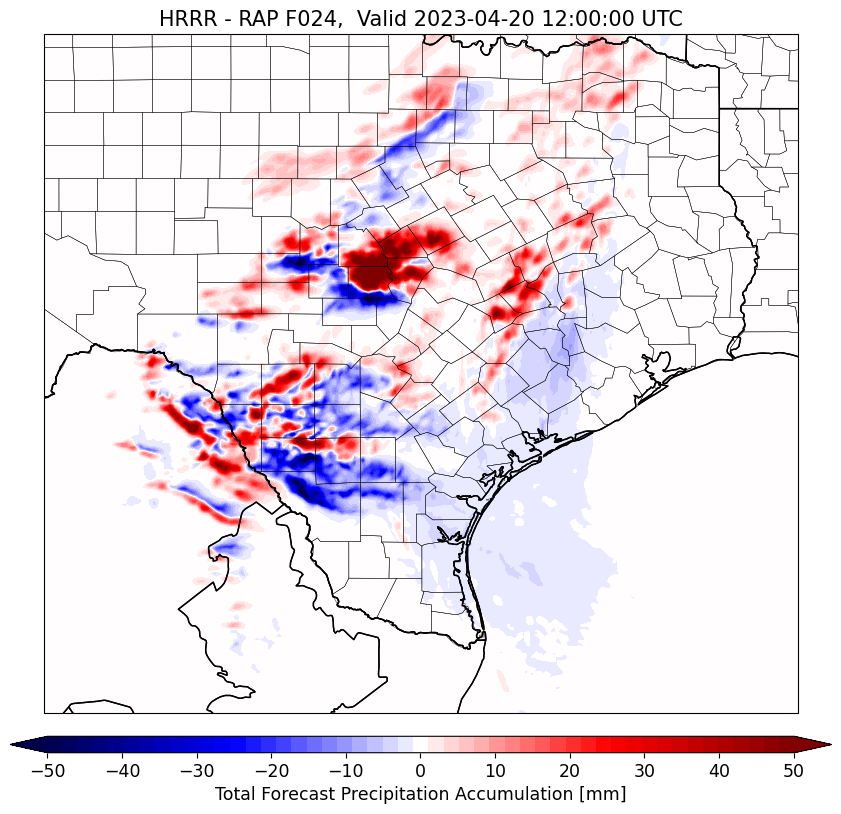

In [10]:
# Define your custom colorbar bounds
cbar_min = -50
cbar_max = 50.1
clevs = np.linspace(cbar_min, cbar_max, 50)
# color palette
colors = seaborn.color_palette("seismic", as_cmap=True)

# create plot
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, 
                       figsize=(8.3,8), constrained_layout=True)

# plot HRRR - RAP
c0 = ax.contourf(lon, lat, precip_h.values - precip_r.values,
                 clevs, transform=ccrs.PlateCarree(),
                 cmap=colors, extend="both")

# mapping
plt_area = [-103, -93, 25, 34] # W, E, S, N
ax.coastlines()
ax.add_feature(cpf.BORDERS)
ax.add_feature(cpf.STATES)
ax.set_extent(plt_area)
# Load the json file with county coordinates
geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')
geoData.plot(ax=ax, color="none", lw=0.3, aspect=1)

# set title
ax.set_title(f"HRRR - RAP F0{hr},  Valid 2023-04-20 12:00:00 UTC")

# Add colorbar
cbar = fig.colorbar(c0, ax=ax, orientation='horizontal', extend=True, pad=0.03, aspect=50)
cbar.set_label('Total Forecast Precipitation Accumulation [mm]')
cbar.set_ticks(np.arange(cbar_min, cbar_max, 10))

# save figure
plt.show()
fig.savefig(f"{figdir}precipdiff_TX.png")
plt.close()

RAP Total - Non-Convective Precip

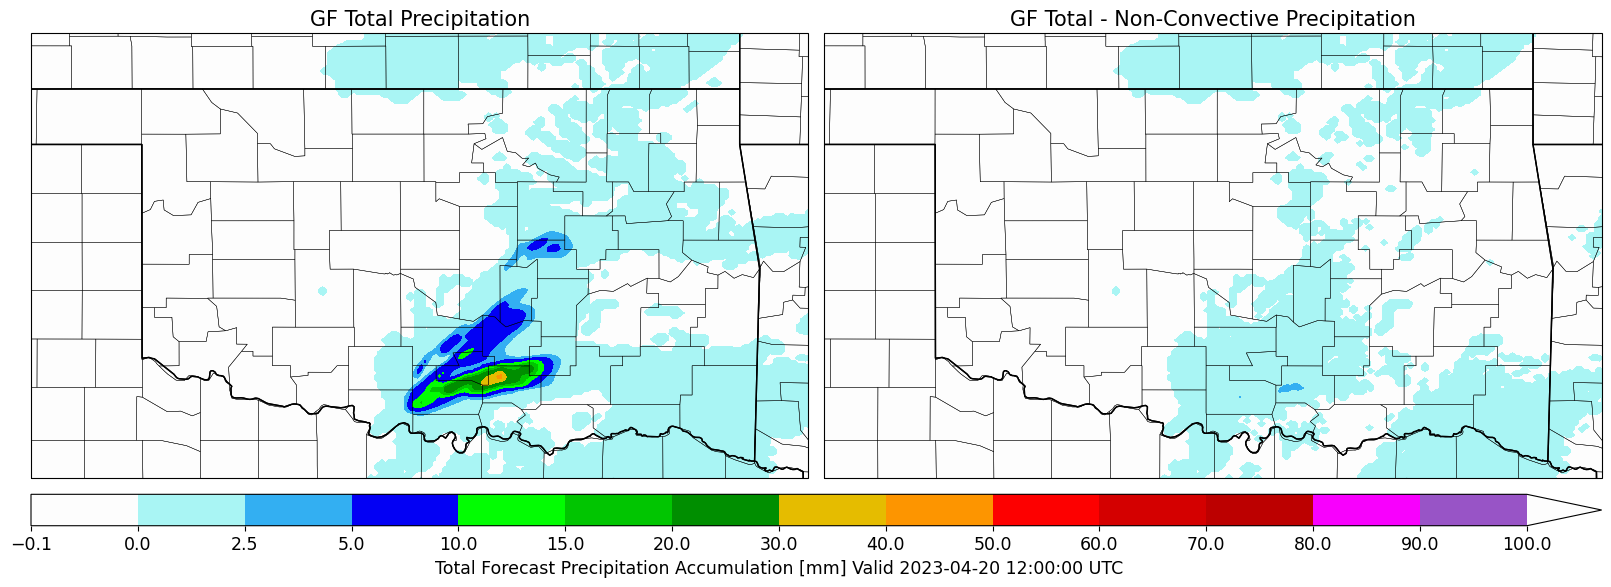

In [11]:
colors = mcolors.ListedColormap(nws_precip_colors)
# custom colorbar values
clevs = [-0.1, 0.0, 2.5, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# normalize colors around clevs
norm = mcolors.BoundaryNorm(clevs, 16)

# create plot
fig, ax = plt.subplots(ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, 
                       figsize=(16,5.9), constrained_layout=True)

# plot HRRR
c0 = ax[0].contourf(lon, lat, precip_r.values, clevs, 
                    transform=ccrs.PlateCarree(), 
                    cmap=colors, norm=norm, extend="max")
# plot RAP
c1 = ax[1].contourf(lon, lat, precip_r.values - nonc_r.values, clevs, 
                    transform=ccrs.PlateCarree(), 
                    cmap=colors, norm=norm, extend="max")

# mapping
plt_area = [-101, -94, 33.5, 37.5] # W, E, S, N
for i, iax in enumerate(ax):
    iax.coastlines()
    iax.add_feature(cpf.BORDERS)
    iax.add_feature(cpf.STATES)
    iax.set_extent(plt_area)
    # Load the json file with county coordinates
    geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')
    geoData.plot(ax=iax, color="none", lw=0.3, aspect=1)

# set title
ax[0].set_title(f"GF Total Precipitation")
ax[1].set_title(f"GF Total - Non-Convective Precipitation")

# Add colorbar
cbar = fig.colorbar(c1, ax=ax, orientation='horizontal', extend=True, pad=0.03, aspect=50)
cbar.set_label('Total Forecast Precipitation Accumulation [mm] Valid 2023-04-20 12:00:00 UTC')
cbar.set_ticks(clevs)

# save and close figure
# plt.savefig(f"{figdir}precip_OKTX.png")
plt.show()
plt.close()